In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [2]:
# loading the csv data to a Pandas DataFrame
ev= pd.read_csv('C:\\Users\\Himani\\Desktop\\pp/data.csv')

In [3]:
# checking the number of missing values
ev.isnull().sum()

id                         0
clusterId                  0
Date                       0
connectionTime             0
Num. Rep.                  0
disconnectTime             0
Time Diff                  0
Session Length             0
Avg.Sess.                  0
donechargingTime           1
kWhDelivered               0
Avg. Consump               0
sessionId                  0
siteId                     0
spaceID                    0
stationID                  0
timezone                   0
userID                   298
Precip Type                0
temperature                0
Avg. Humidity              0
Avg Wind Speed(mph)        0
Wind Bearing(degrees)      0
Visibility(km)             0
Loud Cover                 0
Pressure(millibar)         0
Daily summary              0
dtype: int64

In [4]:
ev["donechargingTime"] = ev["donechargingTime"].fillna(ev["donechargingTime"].mode()[0])

In [5]:
NAs = pd.concat([ev.isnull().sum()], axis=1, keys=["EV"])
NAs[NAs.sum(axis=1) > 0]

,EV
userID,298


In [6]:
ev.pop("userID")

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
294   NaN
295   NaN
296   NaN
297   NaN
298   NaN
Name: userID, Length: 299, dtype: float64

In [7]:
ev.corr()

C:\Users\Himani\AppData\Local\Temp\ipykernel_29268\576543398.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ev.corr()


,clusterId,Num. Rep.,Session Length,Avg.Sess.,kWhDelivered,Avg. Consump,siteId,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibar)
clusterId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num. Rep.,NaN,1.000000,-0.006438,-0.105431,-0.060010,-0.151705,NaN,-0.192787,-0.109221,0.124439,-0.082490,-0.184083,NaN,-0.076314
Session Length,NaN,-0.006438,1.000000,0.136738,0.310325,0.068062,NaN,0.150531,0.210982,0.071906,0.143226,-0.086973,NaN,-0.116158
Avg.Sess.,NaN,-0.105431,0.136738,1.000000,-0.028790,-0.306549,NaN,0.597536,0.743543,0.441166,-0.095027,0.324415,NaN,-0.032252
kWhDelivered,NaN,-0.060010,0.310325,-0.028790,1.000000,0.136078,NaN,-0.088631,-0.066617,-0.014799,-0.060507,0.071274,NaN,0.077324
Avg. Consump,NaN,-0.151705,0.068062,-0.306549,0.136078,1.000000,NaN,0.007092,0.010471,-0.627740,0.578792,-0.097441,NaN,-0.061571
siteId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,NaN,-0.192787,0.150531,0.597536,-0.088631,0.007092,NaN,1.000000,0.734907,-0.111375,0.232455,0.574416,NaN,0.028210
Avg. Humidity,NaN,-0.109221,0.210982,0.743543,-0.066617,0.010471,NaN,0.734907,1.000000,0.113319,0.348580,0.203647,NaN,-0.092720
Avg Wind Speed(mph),NaN,0.124439,0.071906,0.441166,-0.014799,-0.627740,NaN,-0.111375,0.113319,1.000000,-0.494134,-0.212482,NaN,-0.211034


In [8]:
ev.describe()

,clusterId,Num. Rep.,Session Length,Avg.Sess.,kWhDelivered,Avg. Consump,siteId,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibar)
count,299.0,299.000000,299.000000,299.000000,299.000000,299.000000,299.0,299.000000,299.000000,299.000000,299.000000,299.000000,299.0,299.000000
mean,39.0,14.055920,5.659264,5.863428,8.880215,9.077592,2.0,26.075790,35.486688,12.205524,216.675585,14.784162,0.0,1012.212542
std,0.0,6.491128,3.649564,0.664461,7.517564,0.629821,0.0,1.405486,1.471998,1.271501,113.151907,2.130799,0.0,4.072541
min,39.0,0.040000,0.100000,4.600000,0.546000,6.480000,2.0,24.372222,33.836492,10.236100,10.000000,9.901500,0.0,1004.550000
25%,39.0,13.905000,2.345000,5.413281,3.507000,8.635000,2.0,24.844444,34.846153,11.076800,124.000000,14.168000,0.0,1009.550000
50%,39.0,15.920000,5.200000,5.549357,6.764000,9.110000,2.0,25.416667,34.864321,12.075100,271.000000,15.729700,0.0,1011.920000
75%,39.0,17.685000,8.605000,6.285223,12.951500,9.485000,2.0,27.383333,35.872643,13.540000,300.000000,16.100000,0.0,1015.720000
max,39.0,23.900000,18.170000,8.207187,47.808000,11.770000,2.0,28.511111,38.763024,14.021400,339.000000,16.100000,0.0,1016.850000


In [9]:
ev.corr()

C:\Users\Himani\AppData\Local\Temp\ipykernel_29268\576543398.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ev.corr()


,clusterId,Num. Rep.,Session Length,Avg.Sess.,kWhDelivered,Avg. Consump,siteId,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibar)
clusterId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num. Rep.,NaN,1.000000,-0.006438,-0.105431,-0.060010,-0.151705,NaN,-0.192787,-0.109221,0.124439,-0.082490,-0.184083,NaN,-0.076314
Session Length,NaN,-0.006438,1.000000,0.136738,0.310325,0.068062,NaN,0.150531,0.210982,0.071906,0.143226,-0.086973,NaN,-0.116158
Avg.Sess.,NaN,-0.105431,0.136738,1.000000,-0.028790,-0.306549,NaN,0.597536,0.743543,0.441166,-0.095027,0.324415,NaN,-0.032252
kWhDelivered,NaN,-0.060010,0.310325,-0.028790,1.000000,0.136078,NaN,-0.088631,-0.066617,-0.014799,-0.060507,0.071274,NaN,0.077324
Avg. Consump,NaN,-0.151705,0.068062,-0.306549,0.136078,1.000000,NaN,0.007092,0.010471,-0.627740,0.578792,-0.097441,NaN,-0.061571
siteId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,NaN,-0.192787,0.150531,0.597536,-0.088631,0.007092,NaN,1.000000,0.734907,-0.111375,0.232455,0.574416,NaN,0.028210
Avg. Humidity,NaN,-0.109221,0.210982,0.743543,-0.066617,0.010471,NaN,0.734907,1.000000,0.113319,0.348580,0.203647,NaN,-0.092720
Avg Wind Speed(mph),NaN,0.124439,0.071906,0.441166,-0.014799,-0.627740,NaN,-0.111375,0.113319,1.000000,-0.494134,-0.212482,NaN,-0.211034


In [10]:
ev.drop(['id','clusterId','Date','connectionTime','sessionId','spaceID','stationID','disconnectTime','siteId','Time Diff','donechargingTime','timezone','Precip Type','Loud Cover','Daily summary'],axis=1,inplace=True)

In [11]:
ev

,Num. Rep.,Session Length,Avg.Sess.,kWhDelivered,Avg. Consump,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar)
0,11.13,2.20,5.659264,7.932,8.88,24.372222,34.846153,13.5400,300,9.9015,1004.55
1,13.75,11.19,5.670872,10.013,8.88,24.372222,34.846153,13.5400,300,9.9015,1004.55
2,13.76,10.33,5.652290,5.257,8.88,24.372222,34.846153,13.5400,300,9.9015,1004.55
3,14.62,9.31,5.636486,5.177,8.89,24.372222,34.846153,13.5400,300,9.9015,1004.55
4,14.68,8.38,5.624034,10.119,8.90,24.372222,34.846153,13.5400,300,9.9015,1004.55
...,...,...,...,...,...,...,...,...,...,...,...
294,16.88,8.21,6.548000,7.799,7.71,28.511111,38.763024,12.4883,339,16.1000,1009.55
295,16.98,8.11,6.132500,11.304,7.68,28.511111,38.763024,12.4883,339,16.1000,1009.55
296,17.15,7.22,5.473333,1.943,6.48,28.511111,38.763024,12.4883,339,16.1000,1009.55
297,17.19,2.98,4.600000,7.053,8.74,28.511111,38.763024,12.4883,339,16.1000,1009.55


<Axes: >

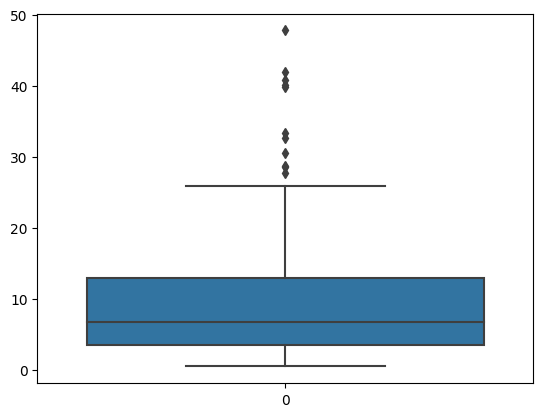

In [12]:
#Boxplot
sns.boxplot(ev['kWhDelivered'])

In [13]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination='auto',max_features=1.0)
model.fit(ev[['kWhDelivered']])

IsolationForest()

In [14]:
ev['newkWh']=model.decision_function(ev[['kWhDelivered']])
ev['anomaly']=model.predict(ev[['kWhDelivered']])
ev.head(10)

,Num. Rep.,Session Length,Avg.Sess.,kWhDelivered,Avg. Consump,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),newkWh,anomaly
0,11.13,2.20,5.659264,7.932,8.88,24.372222,34.846153,13.54,300,9.9015,1004.55,0.045206,1
1,13.75,11.19,5.670872,10.013,8.88,24.372222,34.846153,13.54,300,9.9015,1004.55,0.039860,1
2,13.76,10.33,5.652290,5.257,8.88,24.372222,34.846153,13.54,300,9.9015,1004.55,0.066276,1
3,14.62,9.31,5.636486,5.177,8.89,24.372222,34.846153,13.54,300,9.9015,1004.55,0.067819,1
4,14.68,8.38,5.624034,10.119,8.90,24.372222,34.846153,13.54,300,9.9015,1004.55,0.045918,1
5,14.73,10.56,5.614660,7.910,8.90,24.372222,34.846153,13.54,300,9.9015,1004.55,0.047112,1
6,14.80,3.67,5.597782,15.294,8.90,24.372222,34.846153,13.54,300,9.9015,1004.55,-0.023068,-1
7,14.97,4.13,5.604384,6.953,8.88,24.372222,34.846153,13.54,300,9.9015,1004.55,0.071577,1
8,15.18,3.08,5.609450,2.174,8.89,24.372222,34.846153,13.54,300,9.9015,1004.55,0.045079,1
9,15.20,3.29,5.618172,2.439,8.91,24.372222,34.846153,13.54,300,9.9015,1004.55,0.064144,1


In [15]:
outliers_counter =len(ev[ev['anomaly'] ==-1])
outliers_counter   

54

In [16]:
ev_data = ev[(ev['anomaly'] ==1)]

In [17]:
ev_data

,Num. Rep.,Session Length,Avg.Sess.,kWhDelivered,Avg. Consump,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),newkWh,anomaly
0,11.13,2.20,5.659264,7.932,8.88,24.372222,34.846153,13.5400,300,9.9015,1004.55,0.045206,1
1,13.75,11.19,5.670872,10.013,8.88,24.372222,34.846153,13.5400,300,9.9015,1004.55,0.039860,1
2,13.76,10.33,5.652290,5.257,8.88,24.372222,34.846153,13.5400,300,9.9015,1004.55,0.066276,1
3,14.62,9.31,5.636486,5.177,8.89,24.372222,34.846153,13.5400,300,9.9015,1004.55,0.067819,1
4,14.68,8.38,5.624034,10.119,8.90,24.372222,34.846153,13.5400,300,9.9015,1004.55,0.045918,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,16.88,8.21,6.548000,7.799,7.71,28.511111,38.763024,12.4883,339,16.1000,1009.55,0.035757,1
295,16.98,8.11,6.132500,11.304,7.68,28.511111,38.763024,12.4883,339,16.1000,1009.55,0.019721,1
296,17.15,7.22,5.473333,1.943,6.48,28.511111,38.763024,12.4883,339,16.1000,1009.55,0.039042,1
297,17.19,2.98,4.600000,7.053,8.74,28.511111,38.763024,12.4883,339,16.1000,1009.55,0.064699,1


#Splitting the features and target 

In [18]:
X = ev_data.drop(['kWhDelivered','newkWh','anomaly','Session Length'],axis=1)
Y = ev_data['kWhDelivered']

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(X)

StandardScaler()

In [21]:
standardized_data = scaler.transform(X)

In [22]:
print(standardized_data)

[[-0.43445507 -0.92934958 -0.31747837 ...  0.71647667 -2.26338664
  -1.85817597]
 [-0.03037377  1.68925744 -0.30002053 ...  0.71647667 -2.26338664
  -1.85817597]
 [-0.02883147  1.43875666 -0.32796765 ...  0.71647667 -2.26338664
  -1.85817597]
 ...
 [ 0.49400655  0.53287592 -0.59710252 ...  1.06261554  0.62525796
  -0.63063526]
 [ 0.50017573 -0.7021512  -1.91052118 ...  1.06261554  0.62525796
  -0.63063526]
 [ 0.54490228  0.24159594  0.5258203  ...  1.06261554  0.62525796
  -0.63063526]]


In [23]:
X = standardized_data
Y = ev_data['kWhDelivered']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [25]:
regressor = RandomForestRegressor(n_estimators=100)

In [26]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [27]:
test_data_prediction = regressor.predict(X_test)

In [28]:
print(test_data_prediction)

[10.06255  5.30626  5.44266 12.41879  5.07361  5.84853  5.31691  6.44019
  2.12674  3.52117  4.3245   4.2989   5.65184 11.85288 11.72629  8.65187
  6.3993   4.33753  7.53734  8.82241  4.83035  9.4584   9.78707  7.01311
  9.16464 12.23625  8.66877  6.10816  9.01406  5.00936  8.92424  4.7939
  9.21355  8.59404  7.11561 11.57764  5.10176  2.52998 10.18053  4.07202
  5.57196  4.88714  8.57558  2.67828  7.35483  8.85264  7.06639  2.61764
  6.27425]


In [29]:
Y_test = list(Y_test)

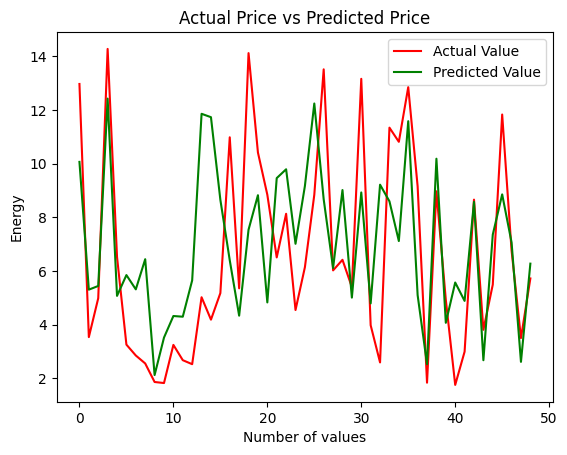

In [30]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [31]:
def smape(actual, predicted):
    """
    Calculate SMAPE (Symmetric Mean Absolute Percentage Error) for actual and predicted values.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    return 100/len(actual) * np.sum(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))


In [32]:
mean_absolute_error(Y_test, test_data_prediction)

2.4858673469387758

In [33]:
rms = sqrt(mean_squared_error(Y_test, test_data_prediction))

In [34]:
print(rms)

3.085709799513274


In [35]:
test_d_prediction = regressor.predict(X_train)

In [36]:
# R squared error
error_score = metrics.r2_score(Y_train,test_d_prediction )
print("R squared error : ", error_score)

R squared error :  0.8812466675190116


In [37]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.31321249488737746


In [38]:
smape_score = smape(Y_test, test_data_prediction)
print("SMAPE score: ", smape_score)

SMAPE score:  38.595605670233226


#SVM

In [39]:
svr = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
svr.fit(X_train,Y_train)

SVR(C=10, gamma=0.1)

In [40]:
y_pred = svr.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)

In [41]:
print(y_pred)

[ 8.84512131  6.13224049  5.04344965 12.54366451  7.11263871  8.80179884
  7.25300596  7.22349377  5.02524166  5.84385417  5.19553119  5.34130478
  8.20482402  8.28837549  7.44018172  5.71281887  8.68966     8.48490266
  9.02803767  5.58726474  4.66532253 13.44234484  6.88464912  5.55977243
 10.3732026   8.83711988  6.53769088  5.59463838  8.24189681  6.87133526
  6.08878261  4.71497111  5.22299064  7.07527392  6.54639096  7.81554085
  6.83568189  2.21532869  7.54364657  5.66794435  8.13294792  5.84094814
  3.39285431 10.21441834  5.88255934  5.88704154  6.3608041   2.22797684
  5.38005762]


In [42]:
Y_test = list(Y_test)

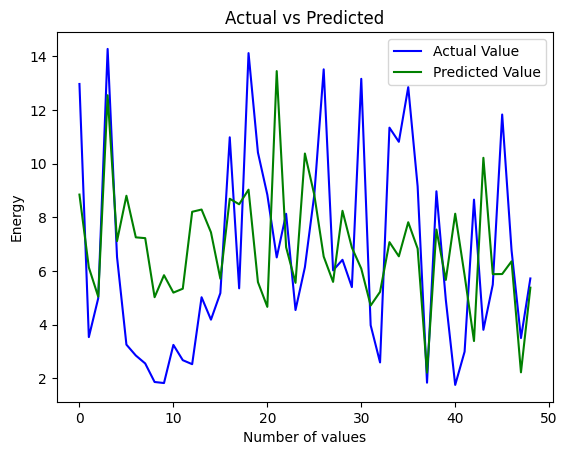

In [43]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual vs Predicted')
plt.xlabel('Number of values')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [44]:
mean_absolute_error(Y_test, y_pred)

3.0589204540035584

In [45]:
rms = sqrt(mean_squared_error(Y_test, y_pred))

In [46]:
print(rms)

3.7137739286564666


In [47]:
# R squared error
error_score = metrics.r2_score(Y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.005183105619501749


In [48]:
smape_score = smape(Y_test, y_pred)
print("SMAPE score: ", smape_score)

SMAPE score:  47.31016738663388


#XGB

In [49]:
# loading the model
xb_model = XGBRegressor()

In [50]:
# training the model with X_train
xb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [51]:
test_prediction = xb_model.predict(X_test)

In [52]:
print(test_prediction)

[ 7.7580833  6.548069   5.678781  14.09994    3.210974   5.54566
  5.3290052  7.120571   1.3510475  3.962157   5.5517936  2.527954
  3.2994184 11.14076   11.497304   6.9588213  5.140673   6.3707857
 10.319428   9.567315   4.3032684  7.5282903  8.233608   5.7846823
  6.1296206 14.96505    5.808554   7.347425   7.757791   5.4746094
  9.760301   5.1303573  9.110346   8.212273   6.8438163 12.022353
  4.927993   1.9052207  9.273723   4.0640187  6.117565   3.9076319
  9.0323515  3.5464766  8.120936   8.687363   7.0398436  3.5863955
  2.9125683]


In [53]:
Y_test = list(Y_test)

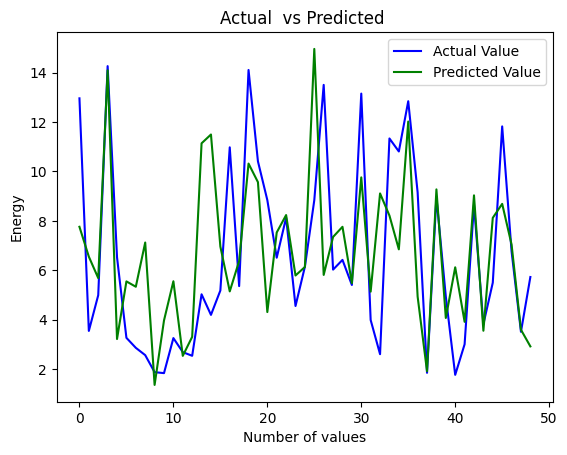

In [54]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_prediction, color='green', label='Predicted Value')
plt.title('Actual  vs Predicted ')
plt.xlabel('Number of values')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [55]:
mean_absolute_error(Y_test, test_prediction)

2.3884271895739495

In [56]:
rms = sqrt(mean_squared_error(Y_test, test_prediction))

In [57]:
print(rms)

3.204568268199326


In [58]:
# R squared error
error_score = metrics.r2_score(Y_test, test_prediction)
print("R squared error : ", error_score)

R squared error :  0.259284757298906


In [59]:
smape_score = smape(Y_test, test_prediction)
print("SMAPE score: ", smape_score)

SMAPE score:  37.17629230947419


#ANN 

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [61]:
# layers
model=Sequential()
model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

In [62]:
# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam')


In [63]:
# Train the model on the training dataset
model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 1s 75ms/step - loss: 7.5970 - val_loss: 6.6876
Epoch 2/20
3/3 [==============================] - 0s 14ms/step - loss: 7.5931 - val_loss: 6.6834
Epoch 3/20
3/3 [==============================] - 0s 14ms/step - loss: 7.5888 - val_loss: 6.6788
Epoch 4/20
3/3 [==============================] - 0s 15ms/step - loss: 7.5840 - val_loss: 6.6735
Epoch 5/20
3/3 [==============================] - 0s 15ms/step - loss: 7.5785 - val_loss: 6.6673
Epoch 6/20
3/3 [==============================] - 0s 14ms/step - loss: 7.5719 - val_loss: 6.6600
Epoch 7/20
3/3 [==============================] - 0s 15ms/step - loss: 7.5640 - val_loss: 6.6510
Epoch 8/20
3/3 [==============================] - 0s 14ms/step - loss: 7.5545 - val_loss: 6.6400
Epoch 9/20
3/3 [==============================] - 0s 14ms/step - loss: 7.5425 - val_loss: 6.6264
Epoch 10/20
3/3 [==============================] - 0s 16ms/step - loss: 7.5276 - val_loss: 6.6092
Epoch 11/20
3/3 [============

In [64]:
# Use the trained model to make predictions on the test dataset
Y_pred = model.predict(X_test)


2/2 [==============================] - 0s 2ms/step


In [65]:
print(Y_pred)

[[0.7065261 ]
 [0.76613253]
 [0.74970317]
 [0.81157994]
 [0.7994267 ]
 [0.864457  ]
 [0.88522065]
 [0.6959158 ]
 [0.6172061 ]
 [0.69441974]
 [0.98007786]
 [0.6033921 ]
 [0.9095951 ]
 [0.5945672 ]
 [0.84089077]
 [0.92401654]
 [0.82220244]
 [0.5989784 ]
 [0.9226263 ]
 [0.79055333]
 [0.6242727 ]
 [0.99806476]
 [0.6249629 ]
 [0.96399057]
 [0.6187656 ]
 [0.6325283 ]
 [0.73163736]
 [0.9608725 ]
 [0.9533342 ]
 [0.8132967 ]
 [0.7636291 ]
 [0.6878564 ]
 [0.84535164]
 [0.7508993 ]
 [0.84745884]
 [0.6867204 ]
 [0.8090699 ]
 [0.7786439 ]
 [0.7049335 ]
 [0.94537586]
 [0.8064352 ]
 [0.6237924 ]
 [1.0570357 ]
 [0.6371332 ]
 [0.7971541 ]
 [0.62400454]
 [0.90560967]
 [0.63480103]
 [0.6219825 ]]


In [66]:
mean_absolute_error(Y_test, Y_pred)

5.8128754999297

In [67]:
rms = sqrt(mean_squared_error(Y_test, Y_pred))

In [68]:
print(rms)

6.903859772306688


In [69]:
# R squared error
error_score = metrics.r2_score(Y_test, Y_pred)
print("R squared error : ", error_score)

R squared error :  -2.4379230290462193


In [70]:
def smape(actual, predicted):
    """
    Calculate SMAPE (Symmetric Mean Absolute Percentage Error) for actual and predicted values.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    return np.mean((np.abs(actual - predicted) / (np.abs(actual) + np.abs(predicted))) * 2) * 100

In [71]:
smape_score = smape(Y_test, Y_pred)
print("SMAPE score:", smape_score)

SMAPE score: 145.17686852864952


In [72]:

stack_regressor = StackingRegressor(estimators=[('rf', regressor), ('xgb', xb_model)])
stack_regressor.fit(X_train, Y_train)


StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [73]:
predictions = stack_regressor.predict(X_test)

In [74]:
print(predictions)

[ 8.11166156  6.43190368  6.33689391 10.49684888  6.58154217  6.75340456
  6.26975307  6.7323331   4.2019224   4.66364768  5.52845334  5.41683152
  6.63185698 10.23890054  9.77330436  7.71295104  6.78106981  5.31885654
  7.70966636  8.21062782  5.80371569  9.06330115  8.90104202  7.26393965
  8.3604258  10.4603251   8.55032668  6.94227287  9.17986597  6.08523015
  8.58808488  5.66412011  8.33476558  8.71781748  7.26634811  9.99489474
  6.03899333  4.05592818  8.93091567  4.99255104  6.86435766  5.79052801
  8.01631826  3.88351413  7.30668397  8.62348794  7.67172292  4.06952741
  6.29680034]


In [75]:
mean_absolute_error(Y_test, predictions)

2.628917686383801

In [76]:
rms = sqrt(mean_squared_error(Y_test, predictions))

In [77]:
print(rms)

3.1081806447115734


In [78]:
# R squared error
error_score = metrics.r2_score(Y_test, predictions)
print("R squared error : ", error_score)

R squared error :  0.30317338626762913


In [79]:
smape_score = smape(Y_test, predictions)
print("SMAPE score:", smape_score)

SMAPE score: 41.76453655431573


In [80]:
stack_regressor = StackingRegressor(estimators=[('rf', regressor), ('xgb', xb_model),('svm',svr)])
stack_regressor.fit(X_train, Y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                              ('svm', SVR(C=10, gamma=0.1))])

In [81]:
pred=stack_regressor.predict(X_test)

In [82]:
print(pred)

[ 9.03072263  6.85063604  6.79035633 10.62922984  6.10909795  6.3450091
  6.04444579  6.66610221  3.84638855  4.46355797  5.08714967  5.5737306
  6.34020041 10.69796768 10.14583902  8.29032805  6.68055508  4.90764357
  7.09169135  8.5553764   5.75176535  8.03075719  8.97818237  7.13474837
  8.10838216 10.65994405  8.71583383  6.73820498  8.67378322  6.20871946
  9.00339572  5.83693601  8.64370527  8.61480453  6.88579081 10.6498559
  6.07554432  4.23101364  9.79685093  5.07632998  6.30742312  6.17541231
  8.17051528  3.44252741  7.57713126  8.2449518   6.85358785  4.48263765
  6.26634396]


In [83]:
mean_absolute_error(Y_test, pred)

2.6247041512225184

In [84]:
rms = sqrt(mean_squared_error(Y_test, pred))

In [85]:
print(rms)

3.1023261138605904


In [86]:
# R squared error
error_score = metrics.r2_score(Y_test, pred)
print("R squared error : ", error_score)

R squared error :  0.30579598208058034


In [87]:
smape_score = smape(Y_test, pred)
print("SMAPE score:", smape_score)

SMAPE score: 41.94383725854816


In [88]:
voting_reg = VotingRegressor(estimators=[('rf', regressor), ('xb', xb_model)])
voting_reg.fit(X_train, Y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('xb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...))])

In [89]:
Y_pred = voting_reg.predict(X_test)

In [90]:
print(Y_pred)

[ 9.03163167  6.3927745   6.04152052 13.17153015  4.62342699  5.57833001
  5.30312262  7.08030557  1.91869876  3.72174351  4.83169679  3.55852205
  4.72266922 11.35831521 11.50992198  7.72243065  5.63140658  5.22919786
  9.05014922  9.03099255  4.64644922  8.59329514  8.98569912  6.63162614
  7.55710528 13.64150987  7.36457209  6.86796249  8.47665552  5.45408469
  9.45960532  5.10038863  8.87525792  8.84261132  6.97354314 11.82282159
  5.07126641  2.26239537 10.10260132  4.08900936  6.03096258  4.41649594
  8.92825575  2.9989233   7.6714682   8.86450634  7.12204678  3.14024775
  4.39727917]


In [91]:
mean_absolute_error(Y_test, Y_pred)

2.4135651448728597

In [92]:
rms = sqrt(mean_squared_error(Y_test, Y_pred))

In [93]:
print(rms)

3.0499869104934985


In [94]:
# R squared error
error_score = metrics.r2_score(Y_test, Y_pred)
print("R squared error : ", error_score)

R squared error :  0.32902216050045585


In [95]:
smape_score = smape(Y_test, y_pred)
print("SMAPE score:", smape_score)

SMAPE score: 47.31016738663388


In [96]:
vote_regressor = VotingRegressor(estimators=[('rf', regressor), ('xgb', xb_model),('svm',svr)])
vote_regressor.fit(X_train, Y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...)),
                            ('svm', SVR(C=10, gamma=0.1))])

In [97]:
predict = vote_regressor.predict(X_test)

In [98]:
print(predict)

[ 8.55449822  6.10385983  5.55918023 13.0119316   5.53838423  6.74170295
  6.0221404   6.95578497  2.96482639  4.37555039  5.07461492  4.2110263
  5.58033749 10.38540531 10.2457819   6.82877339  6.80688105  6.43630279
  8.61010204  7.75601661  4.53716365 10.10121837  8.20745912  6.4074249
  8.52416772 12.05268988  7.19995502  6.45202112  8.35512928  6.00197488
  8.29089775  4.88274946  7.52229549  8.14466885  6.88354575 10.47971467
  5.80143824  2.13437315  8.95603641  4.58507103  6.41379769  4.99709334
  6.68280193  5.43744165  7.18331191  7.9816514   7.03725922  2.74948078
  4.69308865]


In [99]:
mean_absolute_error(Y_test, predict)

2.532578909025667

In [100]:
rms = sqrt(mean_squared_error(Y_test, predict))

In [101]:
print(rms)

3.0473996088733553


In [102]:
# R squared error
error_score = metrics.r2_score(Y_test,predict)
print("R squared error : ", error_score)

R squared error :  0.33016005765807444


In [103]:
smape_score = smape(Y_test,predict)
print("SMAPE score:", smape_score)

SMAPE score: 39.896148450328496
